In [ ]:
#

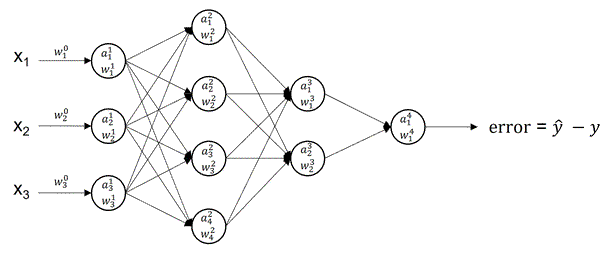

# Deep Neural Networks and Gradient Problems

## 1. Vanishing and Exploding Gradients

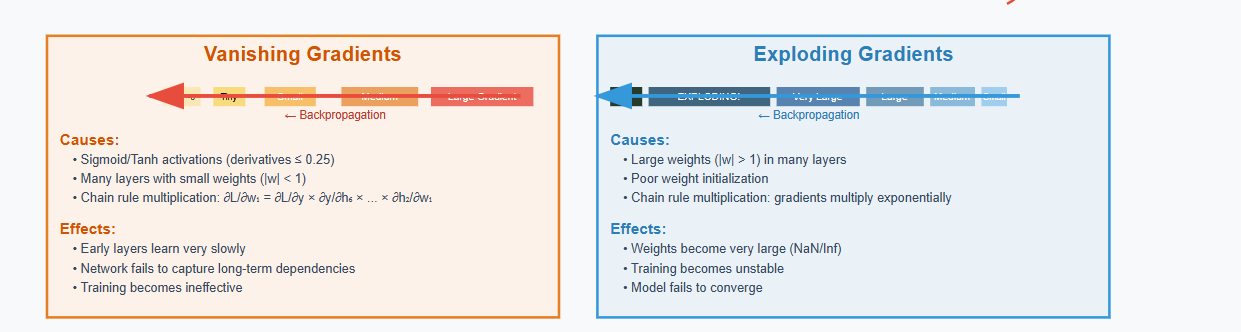



When training deep neural networks with many layers, gradients are propagated backward from the output layer to the input layer. During this process, gradients can:

- **Vanishing Gradient**: Become very small, causing the weights in early layers to update very slowly or not at all. The model fails to learn.
- **Exploding Gradient**: Become very large, causing unstable weight updates and possibly NaN losses.

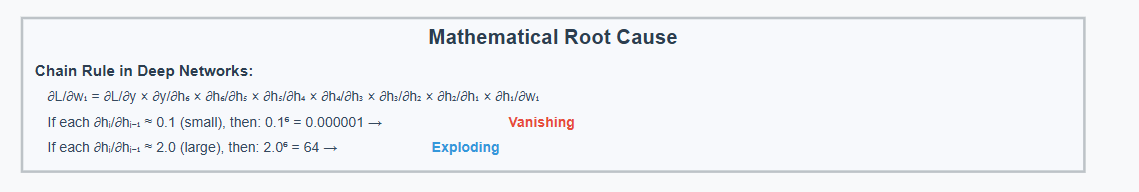

### Why This Happens:
- Each layer computes a gradient and passes it backward.
- If each gradient is < 1, multiplying many of them causes an exponentially smaller number.
- If each gradient is > 1, multiplying many leads to large explosions.

### Effects:
- **Vanishing Gradients**: Common with sigmoid/tanh activation.
- **Exploding Gradients**: Common in unnormalized networks.

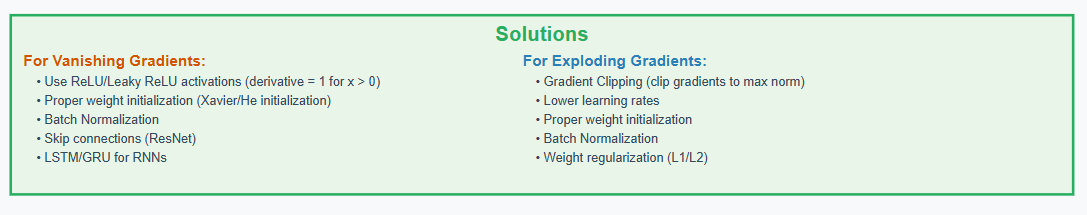
---

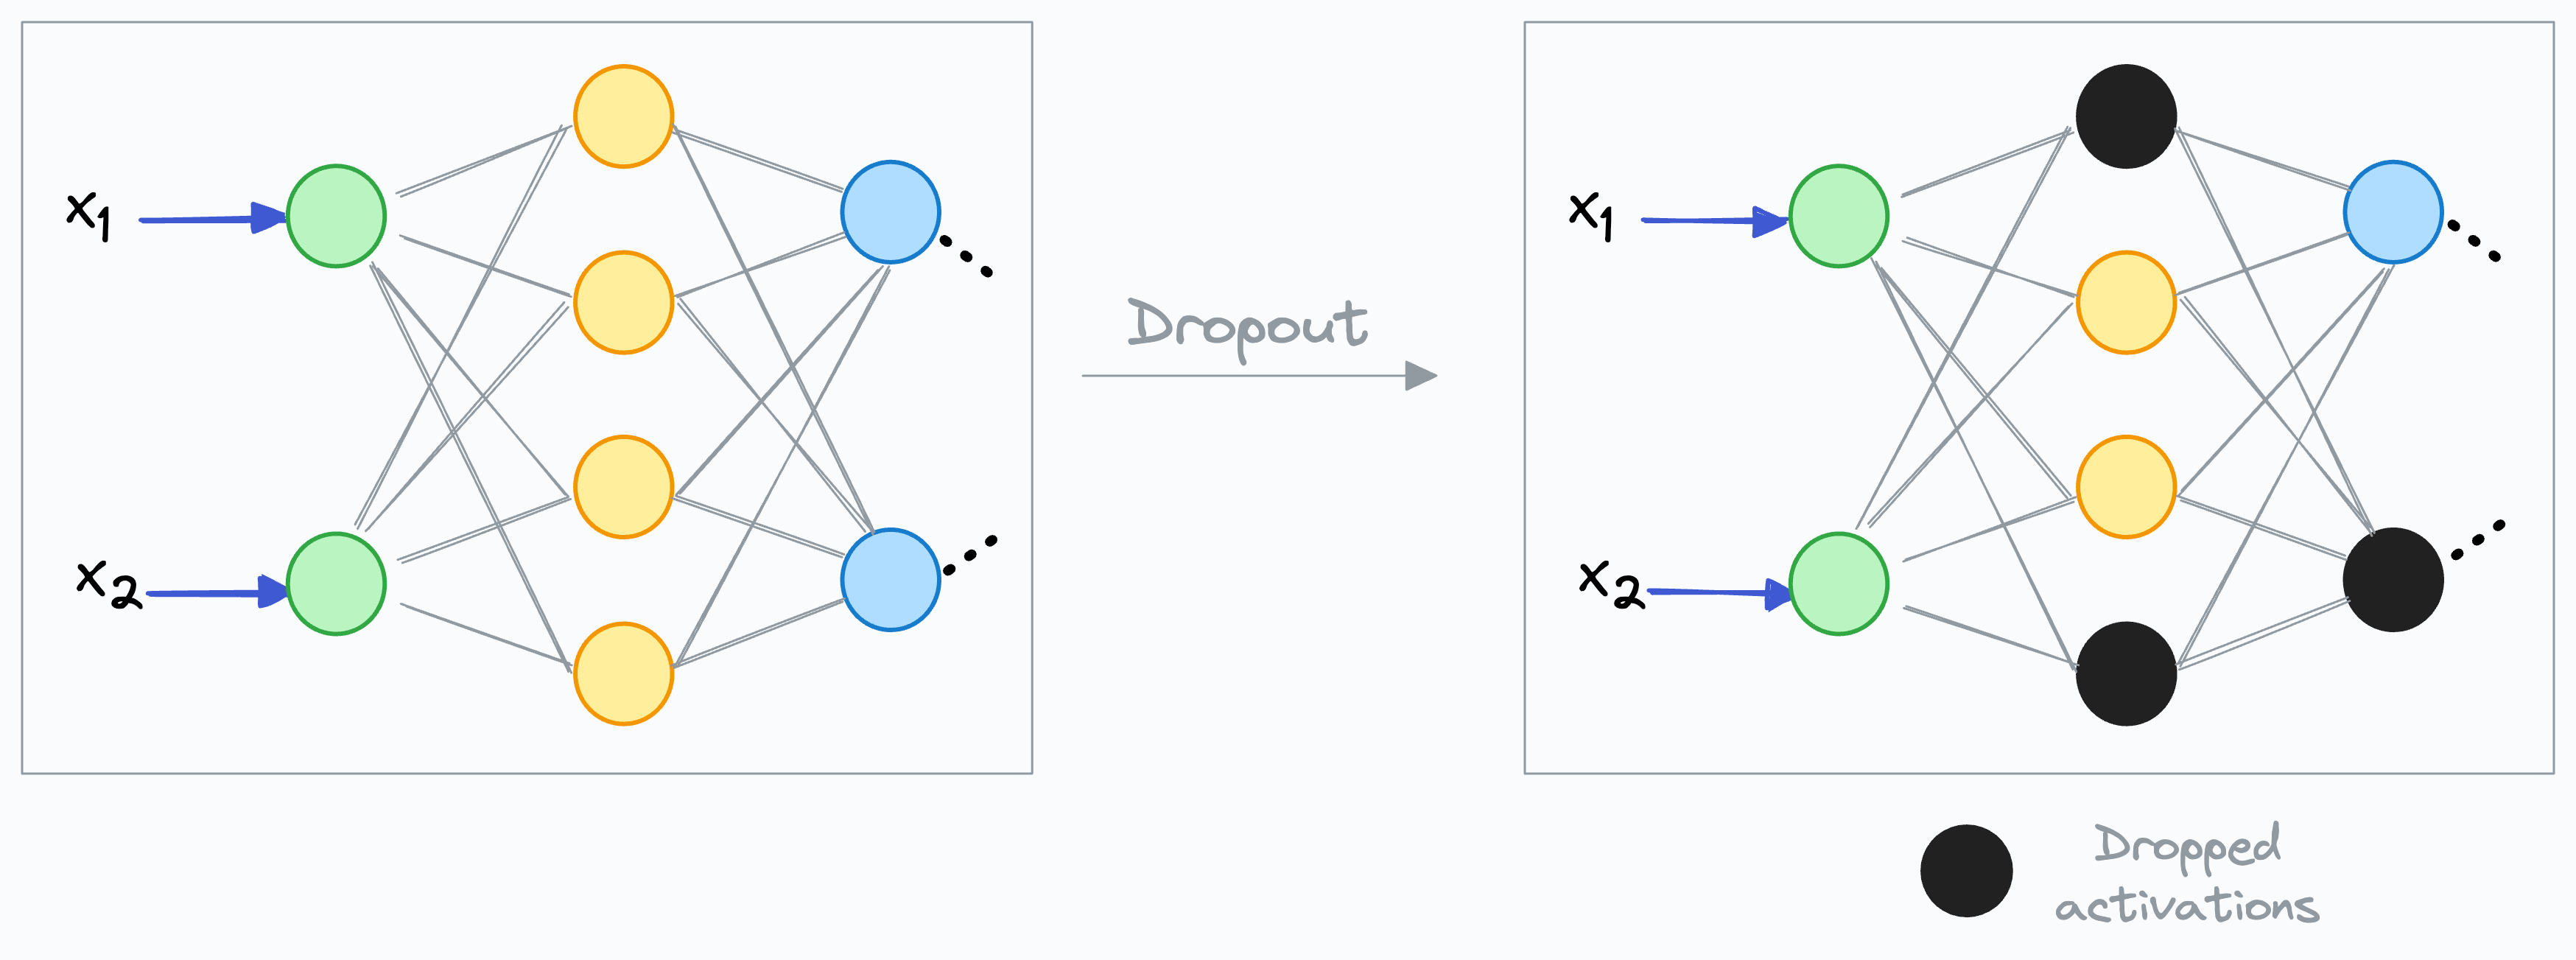

## 2. Role of Activation Functions
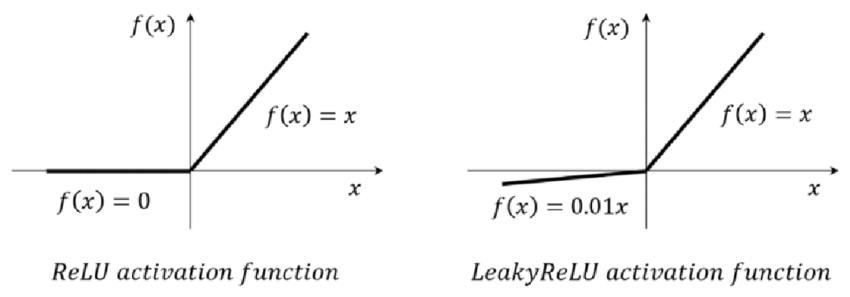
- Sigmoid and tanh squash outputs to a small range (e.g., 0–1 or -1–1), causing small derivatives.
- **ReLU** is preferred as it does not squash gradients (except at zero).
- **Leaky ReLU** improves on ReLU by allowing a small gradient when the input is negative, preventing "dead neurons."

### 🔍 Leaky ReLU
- Formula: \( f(x) = x \) if \( x > 0 \), else \( \alpha x \) (e.g., \( \alpha = 0.01 \))
- Helps maintain gradient flow for negative inputs

---

## 3. Why Normalization is Needed
- As inputs flow through layers, their distributions shift.
- This shift is called **Internal Covariate Shift**.
- Normalization stabilizes the learning process and helps gradients flow better.

---

## 4. Batch Normalization

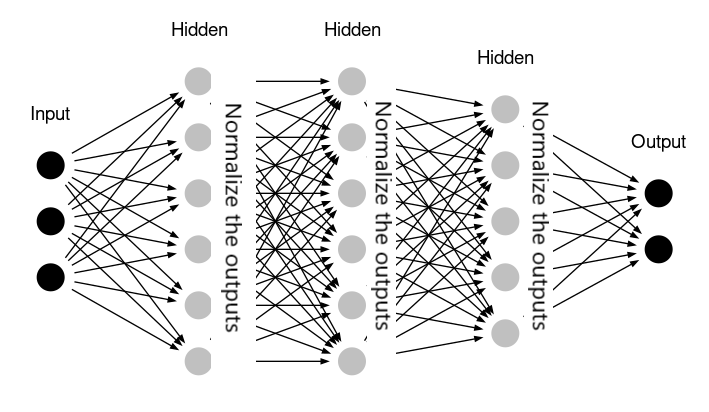

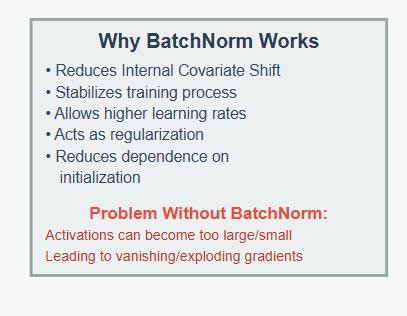

Batch Normalization is a technique that:
- Normalizes the output of a layer across the mini-batch
- Applies a scale and shift (learnable parameters)


### Benefits:
- Faster convergence
- Allows higher learning rates
- Acts as a regularizer

---


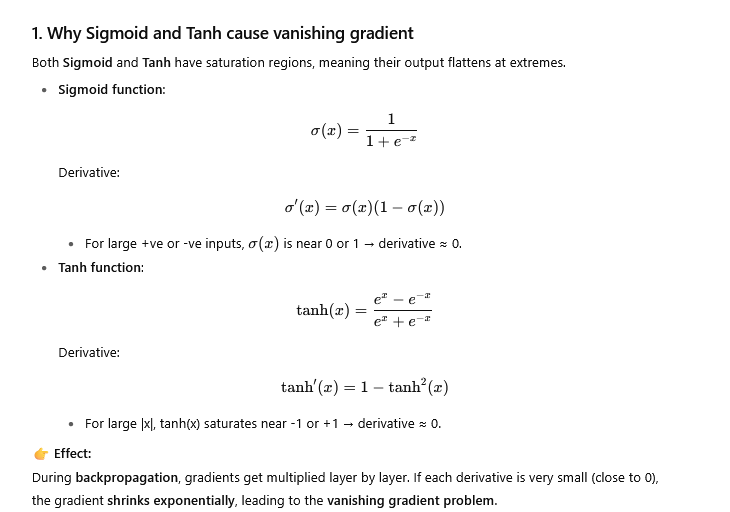

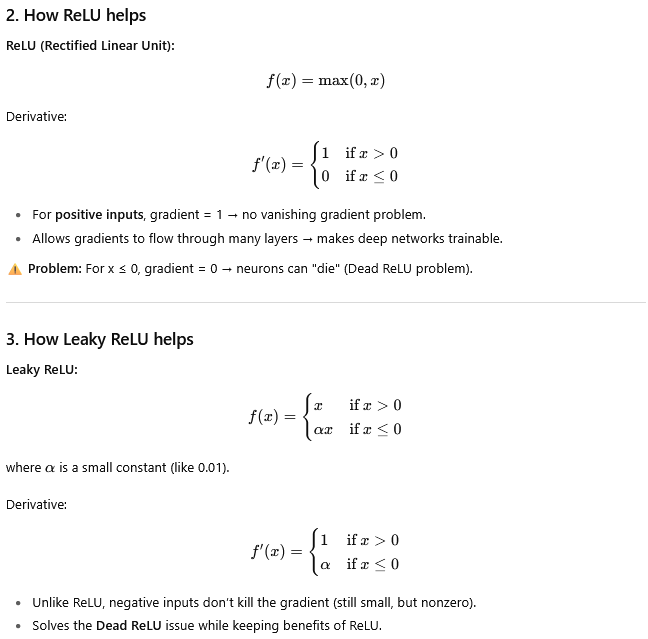

DATASET : https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:

# 🔁 Practical Example: Fashion MNIST Dataset with Simple NN + BatchNorm + LeakyReLU (TensorFlow)

In [ ]:
# Install and import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
# /255 (0-1) -0.5  (-0.5 , 0.5 )  * 2  (-1 , 1) =mean
# Normalize the data to [-1, 1] range
x_train = (x_train / 255.0 - 0.5) * 2
x_test = (x_test / 255.0 - 0.5) * 2



# mean =0  , std =1

In [ ]:
print(len(x_train))

60000


In [ ]:
# Flatten the 28x28 images to 784-dimensional vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
x_train.shape

(60000, 784)

# Normalize the data to [-1, 1] range
# Step-by-step:
# 1. x / 255.0 → scales from [0, 255] to [0, 1]
# 2. - 0.5     → shifts range from [0, 1] to [-0.5, 0.5]
# 3. * 2       → expands to [-1, 1]
# This normalization helps improve gradient flow and model convergence.
x_train = (x_train / 255.0 - 0.5) * 2
x_test = (x_test / 255.0 - 0.5) * 2


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
#check unique value of y_train
import numpy as np

# Count unique values and their counts in y_train
unique_values, counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
print(len(y_train))


Value: 0, Count: 6000
Value: 1, Count: 6000
Value: 2, Count: 6000
Value: 3, Count: 6000
Value: 4, Count: 6000
Value: 5, Count: 6000
Value: 6, Count: 6000
Value: 7, Count: 6000
Value: 8, Count: 6000
Value: 9, Count: 6000
60000


---

## 🧠 Detailed Explanation: Model Architecture & Building (TensorFlow)

### Input Layer
- Accepts 784-dimensional vectors (flattened 28x28 pixel grayscale images)
- Shape: `(784,)`

### Dense Layer 1
- Fully connected layer with 128 neurons
- Performs weighted sum and bias on input features

### Batch Normalization 1
- Normalizes the output of the first dense layer
- Helps reduce internal covariate shift

### Activation: Leaky ReLU 1
- Applies non-linearity
- Allows small gradients even for negative inputs

### Dense Layer 2
- Fully connected layer with 64 neurons

### Batch Normalization 2
- Normalizes the second dense layer's output

### Activation: Leaky ReLU 2
- Same benefits as above

### Output Layer
- Fully connected layer with 10 units (one per class)
- `softmax` activation outputs a probability distribution

### Optimizer
- Adam (adaptive learning rate optimization)

### Loss Function
- Sparse Categorical Crossentropy (suitable for integer-labeled classification)

### Metrics
- Accuracy is tracked during training and evaluation

---

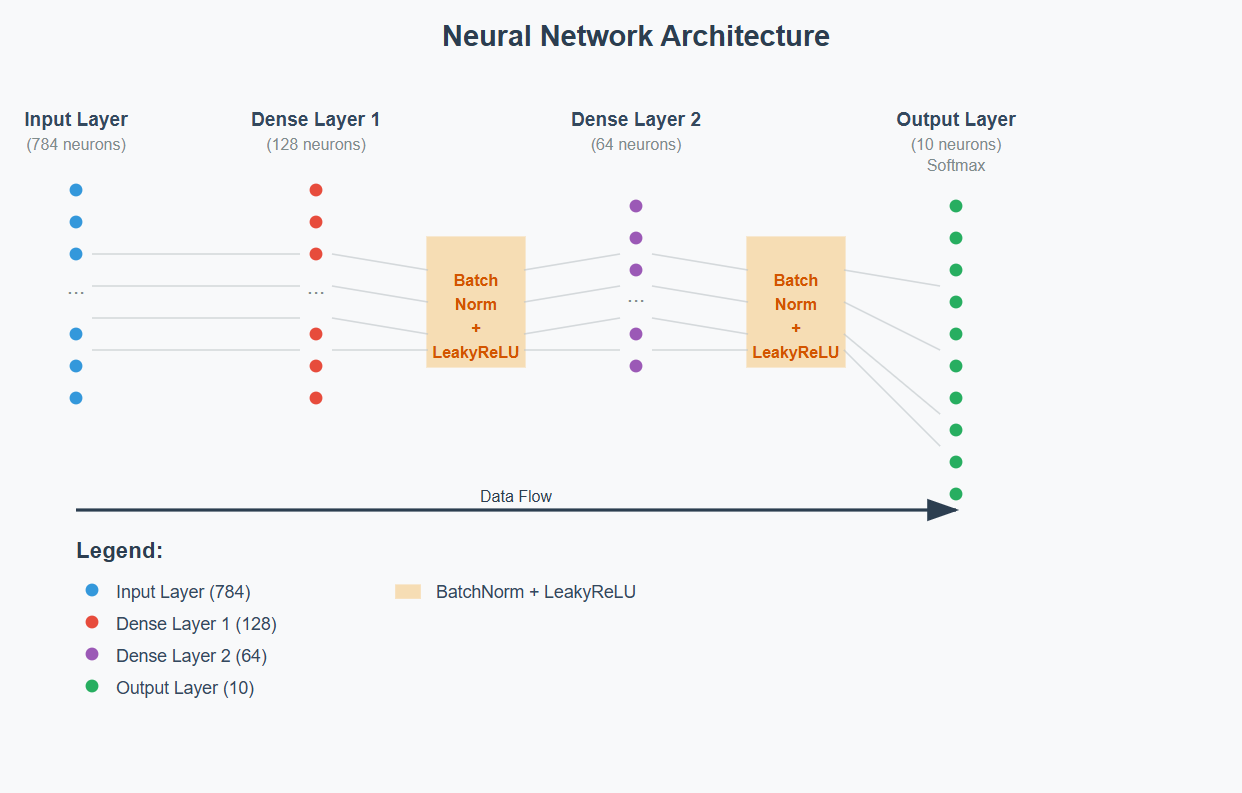

In [ ]:
# Linear Transformation -> Batch Normalization -> Activation Function

In [ ]:
# Build a simple neural network with Batch Normalization and LeakyReLU
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128),
    layers.BatchNormalization(),  # Normalize outputs of dense layer
    layers.LeakyReLU(alpha=0.01),  # Use LeakyReLU instead of standard ReLU
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(10, activation='softmax')
])

# Explanation:
# - Dense layers perform linear transformations
# - BatchNormalization stabilizes outputs before activation
# - LeakyReLU prevents dead neurons and improves gradient flow

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## Why Do We Separate Dense, BatchNormalization, and Activation Layers?

In some previous examples, you might have seen:

layers.Dense(784, activation='relu')

This means the Dense layer applies both a linear transformation and activation at once.

However, when using **Batch Normalization**, the recommended pattern is:

layers.Dense(128),               # Linear transformation only (no activation here)  
layers.BatchNormalization(),     # Normalize outputs of Dense layer before activation  
layers.LeakyReLU(alpha=0.01),    # Apply activation after normalization

### Why?

- Batch Normalization normalizes the output of the **linear layer before the activation**.  
- If activation is inside Dense, BatchNorm would normalize **after activation**, which is not ideal.  
- Some activations like LeakyReLU are separate layers and cannot be passed inside Dense.  
- Separating these layers gives more control and improves training stability.

### Summary:

| Method                               | Pros                              | Cons                         |
|------------------------------------|----------------------------------|------------------------------|
| Dense with activation               | Simple and concise                | Can’t use BatchNorm before activation |
| Separate Dense + BatchNorm + Activation | Correct order and more flexible | Slightly more verbose code    |

### Best Practice:

When using Batch Normalization, **don’t pass activation inside Dense**. Instead, use:

layers.Dense(...)  
layers.BatchNormalization()  
layers.ActivationFunction()  # e.g., LeakyReLU

This ensures BatchNorm works correctly and helps improve model training.


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7808 - loss: 0.6453 - val_accuracy: 0.8617 - val_loss: 0.3902
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8730 - loss: 0.3561 - val_accuracy: 0.8402 - val_loss: 0.4120
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8853 - loss: 0.3112 - val_accuracy: 0.8797 - val_loss: 0.3236
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8968 - loss: 0.2812 - val_accuracy: 0.8863 - val_loss: 0.3221
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9046 - loss: 0.2579 - val_accuracy: 0.8835 - val_loss: 0.3228
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9097 - loss: 0.2460 - val_accuracy: 0.8662 - val_loss: 0.3788
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9141 - loss: 0.2285 - val_accuracy: 0.8858 - val_loss: 0.3246
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9202 - loss: 0.2158 - val_accuracy:

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.3404
Test Accuracy: 88.52%


In [ ]:
# Deep Learning (banking Service -> Qr)   (Image Data 25 samples , 500 , sampling , data augment) : Deep Learning CNN() -> output

# Layer (Paper : Research Architecture )

SyntaxError: invalid syntax (ipython-input-3334248605.py, line 1)

In [ ]:
# Neural image  -> CNN ()

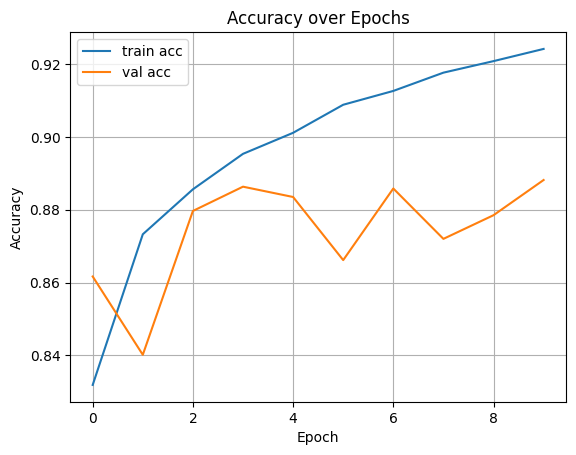

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make a prediction on a single test data point
# Select the first image from the test set
single_image = x_test[0]
single_image_label = y_test[0]

# The model expects a batch of inputs, so we need to add a batch dimension
single_image = single_image.reshape(1, 784)

# Make the prediction
predictions = model.predict(single_image)

print(predictions)

# Get the predicted class (the one with the highest probability)
predicted_class = np.argmax(predictions[0])

print(f"True label: {single_image_label}")
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[8.3614218e-08 5.4759374e-07 2.9846483e-06 1.1179353e-06 2.2787660e-06
  1.1753150e-03 6.9489693e-07 8.2331253e-03 9.0713311e-06 9.9057478e-01]]
True label: 9
Predicted class: 9
